In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic noisy classification data

In [2]:
X = np.linspace(-3, 3, 500).reshape(-1, 1)                            # Input values from -3 to 3
y = (X[:, 0] > 0).astype(np.float32).reshape(-1, 1)                   # Labels: 1 if x > 0 else 0
y += np.random.randn(*y.shape) * 0.1                                 # Add Gaussian noise

# Define model without Batch Normalization

In [3]:
model_no_bn = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=[1]),   # Hidden layer
    tf.keras.layers.Dense(1, activation='sigmoid')                   # Output layer for binary classification
])

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Define model with Batch Normalization

In [4]:
model_with_bn = tf.keras.Sequential([
    tf.keras.layers.Dense(32, input_shape=[1]),                      # Hidden layer without activation first
    tf.keras.layers.BatchNormalization(),                            # Normalize before activation
    tf.keras.layers.Activation('relu'),                              # Apply ReLU after normalization
    tf.keras.layers.Dense(1, activation='sigmoid')                   # Output layer
])

# Compile both models

In [5]:
model_no_bn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_with_bn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train both models

In [6]:
history_no_bn = model_no_bn.fit(X, y, epochs=50, verbose=0, validation_split=0.2)
history_with_bn = model_with_bn.fit(X, y, epochs=50, verbose=0, validation_split=0.2)

# Plot validation accuracy comparison

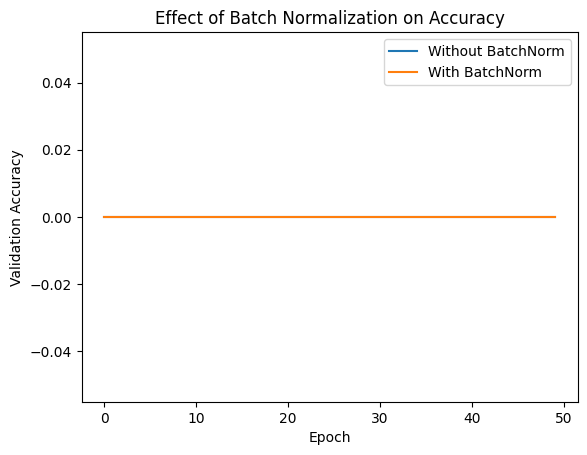

In [7]:
plt.plot(history_no_bn.history['val_accuracy'], label='Without BatchNorm')     # Accuracy without BN
plt.plot(history_with_bn.history['val_accuracy'], label='With BatchNorm')      # Accuracy with BN
plt.title("Effect of Batch Normalization on Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()